<a href="https://colab.research.google.com/github/sh-biswas/demand-forecasting_Cogs109Final/blob/master/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
%matplotlib inline

In [14]:
data = 'https://raw.githubusercontent.com/sh-biswas/demand-forecasting_Cogs109Final/master/train.csv'
data = pd.read_csv(data)

# create arrays to hold parsed year, month, and day
years = np.empty(data.shape[0]).astype('int32')
months = np.empty(data.shape[0]).astype('int32')
days = np.empty(data.shape[0]).astype('int32')
#print(f"len(years): {len(years)}")

# parse "year", "month", and "day" from 'date' string
def date_parser(row):
  #print(f"row: \n{row}")
  #print(f"row['date']: {row['date']}")
  year, month, day = row['date'].split("-")
  #print(f"year: {year} | month: {month} | day: {day}")
  #print(f"row.name: {row.name}")
  years[row.name] = int(year); months[row.name] = month; days[row.name] = day;
  #print(years[row.name])

# call parser on all rows
data.apply(date_parser, axis=1)

# add "year", "month", and "day" columns to data
data['year'] = years
data['month'] = months
data['day'] = days


# separate out train and test data
data = data.sort_values(by = ['date'])
print(f"first test date: {data['date'].unique()[-90]}")
test = data[-45000:][data[-45000:]['item'] == 15]
train = data[:-45000][data[:-45000]['item'] == 15]
#print(f"length of train: {len(train)}")
#print(f"num train dates: {len(train['date'].unique())}")


first test date: 2017-10-03


In [15]:
print(f"THESE SHOULD BE THE SAME: \n{len(years)}\n{len(data.index)}")

THESE SHOULD BE THE SAME: 
913000
913000


In [85]:
train.head(20)

,date,store,item,sales,year,month,day
255640,2013-01-01,1,15,42,2013,1,1
257466,2013-01-01,2,15,65,2013,1,1
259292,2013-01-01,3,15,61,2013,1,1
261118,2013-01-01,4,15,46,2013,1,1
262944,2013-01-01,5,15,31,2013,1,1
264770,2013-01-01,6,15,38,2013,1,1
266596,2013-01-01,7,15,27,2013,1,1
268422,2013-01-01,8,15,44,2013,1,1
270248,2013-01-01,9,15,48,2013,1,1
272074,2013-01-01,10,15,51,2013,1,1


Check if there are any null values

In [17]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
year     0
month    0
day      0
dtype: int64

In [18]:
test.isnull().sum()

date     0
store    0
item     0
sales    0
year     0
month    0
day      0
dtype: int64

There are no null values in both our test and train datasets.

How many different stores are there in the train dataset?

In [19]:
num_stores = len(data.store.unique())
print(num_stores)

10


How many different items in the train dataset?

In [20]:
num_items = len(train.item.unique())
print(num_items)

1


In [92]:
train[:100][ (train['store'] == 1) | (train['store'] == 2) ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,store,item,sales,year,month,day
255640,2013-01-01,1,15,42,2013,1,1
257466,2013-01-01,2,15,65,2013,1,1
257467,2013-01-02,2,15,71,2013,1,2
255641,2013-01-02,1,15,33,2013,1,2
255642,2013-01-03,1,15,45,2013,1,3
257468,2013-01-03,2,15,53,2013,1,3
257469,2013-01-04,2,15,68,2013,1,4
255643,2013-01-04,1,15,39,2013,1,4
255644,2013-01-05,1,15,47,2013,1,5
257470,2013-01-05,2,15,77,2013,1,5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

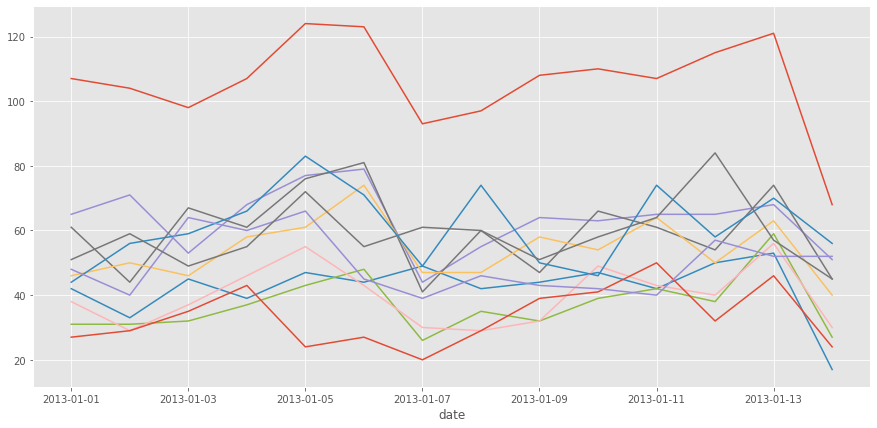

In [119]:
fig, ax = plt.subplots(figsize=(15,7))
train[:140][ (train['store'] == 1) | (train['store'] == 2) ].groupby('date').sum()['sales'].plot(x='date', y='sales', ax=ax)
for i in np.arange(1, 11):
  train[:140][ (train['store'] == i) ].groupby('date').sum()['sales'].plot(x='date', y='sales', ax=ax)

In [120]:
np.argmax(train.groupby(['item']).sum()['sales'])

0

In [121]:
len(train.groupby(['item']).sum()['sales'])

1

In [122]:
# just for store 1 to start
train_store1 = train[ train['store'] == 1]
test_store1 = test[ test['store'] == 1]


# let's do some linear regression!
A = np.vstack((np.ones(len(train_store1)), train_store1['year'], train_store1['month'], train_store1['day'])).T
w = np.linalg.lstsq(A, train_store1['sales'], rcond=None)[0]
print(f"1st order model: {w[0]:0.2f} + {w[1]:0.2f}*year + {w[2]:0.2f}*month + {w[3]:0.2f}*day")


1st order model: -13283.86 + 6.63*year + 1.32*month + -0.02*day


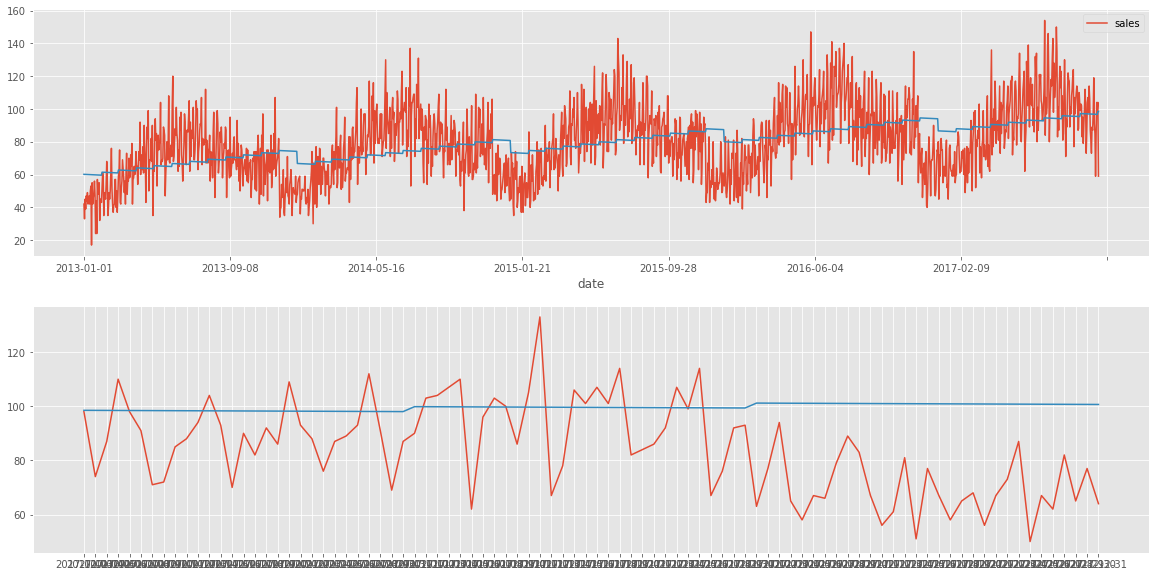

In [123]:
fig, axs = plt.subplots(2,1)
train_store1.plot(x='date', y='sales', figsize=(20,10), ax=axs[0])
axs[1].plot(test_store1['date'].values, test_store1['sales'].values)

## Create a smooth set of Y values for plotting the model
modelYtest = w[0] + w[1]*test_store1['year'].values + w[2]*test_store1['month'].values + w[3]*test_store1['day'].values
modelYtrain = w[0] + w[1]*train_store1['year'].values + w[2]*train_store1['month'].values + w[3]*train_store1['day'].values
axs[1].plot(test_store1['date'].values, modelYtest)
axs[0].plot(train_store1['date'].values, modelYtrain)


Model each item individually for all the stores -> supplier knows how many of each item to distribute over the time span of the test data(supplier perspective)

## First Order Model for All the Stores for Item 15

In [152]:
# let's do some linear regression!
A = np.vstack((np.ones(len(train)), train['year'], train['month'], train['day'])).T
w = np.linalg.lstsq(A, train['sales'], rcond=None)[0]
print(f"1st order model: {w[0]:0.2f} + {w[1]:0.2f}*year + {w[2]:0.2f}*month + {w[3]:0.2f}*day")

1st order model: -14287.85 + 7.13*year + 1.58*month + 0.01*day


MSE_train: 765.2831594505242 | MSE_test: 1098.8060124213198


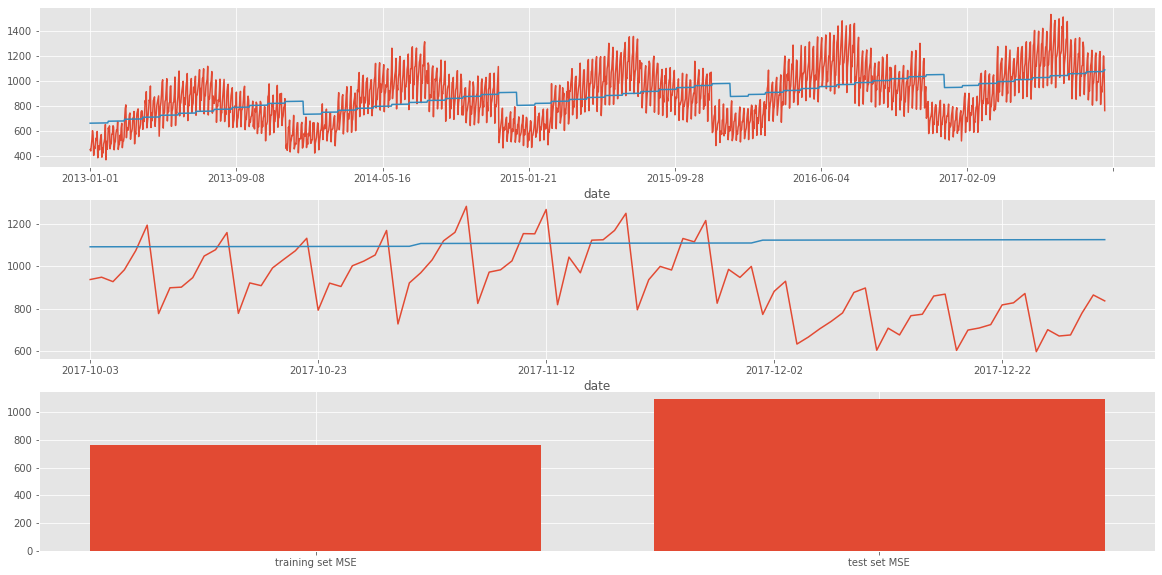

In [167]:
# plot the data
fig, axs = plt.subplots(3,1, figsize=(20,10))
train.groupby('date').sum()['sales'].plot(x='date', y='sales', ax=axs[0])
test.groupby('date').sum()['sales'].plot(x='date', y='sales', ax=axs[1])

## plot the model over data
#agg_train = train.groupby('date').sum(); agg_test = train.groupby('date').sum()
modelYtrain = w[0] + w[1]*train['year'].values + w[2]*train['month'].values + w[3]*train['day'].values
modelYtest = w[0] + w[1]*test['year'].values + w[2]*test['month'].values + w[3]*test['day'].values
train['1st-order model'] = modelYtrain; test['1st-order model'] = modelYtest;
train.groupby('date').sum()['1st-order model'].plot(x='date', y='1st-order model', ax=axs[0])
test.groupby('date').sum()['1st-order model'].plot(x='date', y='1st-order model', ax=axs[1])
#ax[0].plot(train['date'].unique().values, modelYtrain)
#ax[1].plot(test['date'].unique().values, modelYtest)

# plot MSE on train and test for model
MSE_train = np.mean((train['sales'].values - modelYtrain)**2)
MSE_test = np.mean((test['sales'].values - modelYtest)**2)
axs[2].bar(['training set MSE', 'test set MSE'], [MSE_train, MSE_test])
ax[2].set_title("MSE's")
fig.show()
print(f"MSE_train: {MSE_train} | MSE_test: {MSE_test}")

## Include the store as a term: sales and demands could possibly change model 

In [159]:
# let's do some linear regression!
A = np.vstack((np.ones(len(train)), train['year'], train['month'], train['day'], train['store'])).T
w = np.linalg.lstsq(A, train['sales'], rcond=None)[0]
print(f"1st order model: {w[0]:0.2f} + {w[1]:0.2f}*year + {w[2]:0.2f}*month + {w[3]:0.2f}*day + {w[4]:0.2f}*store")


1st order model: -14287.24 + 7.13*year + 1.58*month + 0.01*day + -0.11*store


MSE_train: 764.8013672790076 | MSE_test: 1076.0777008782366


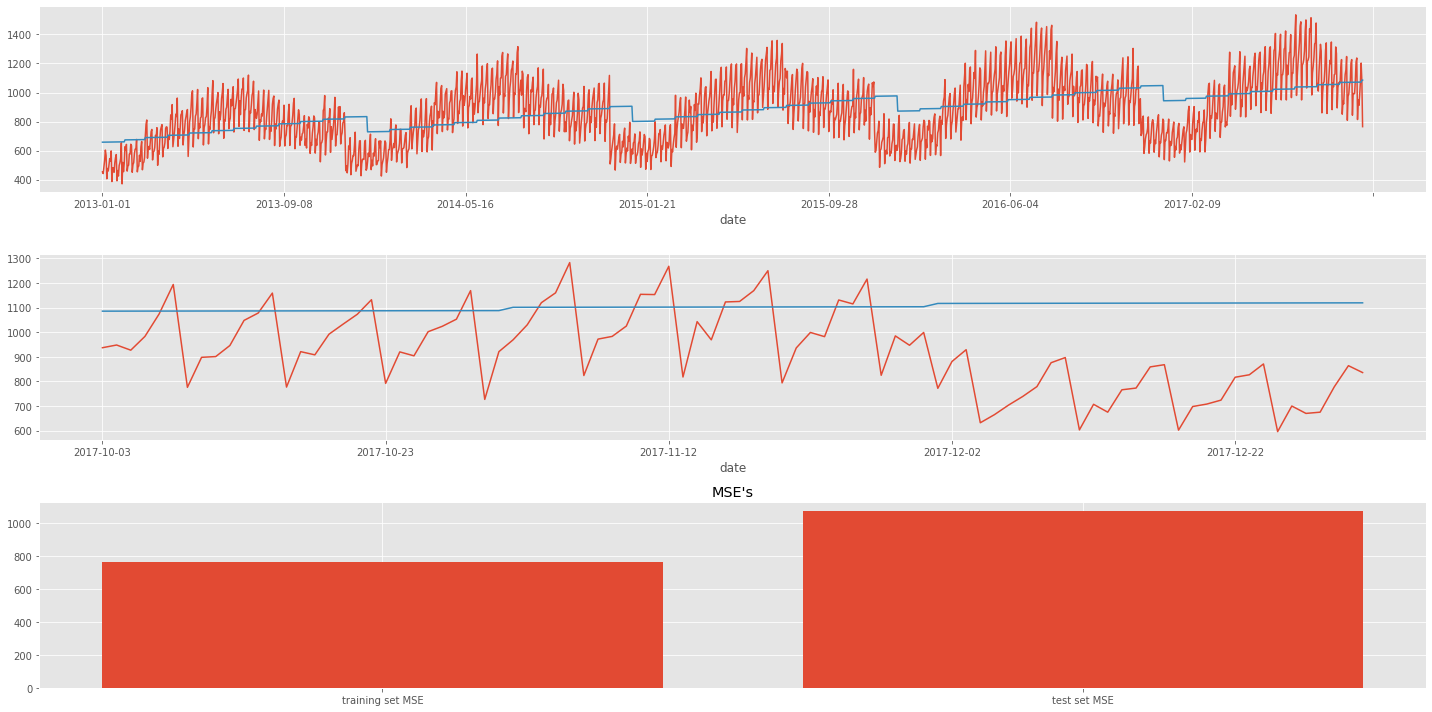

In [166]:
# plot the data
fig, axs = plt.subplots(3,1, figsize=(20,10))
train.groupby('date').sum()['sales'].plot(x='date', y='sales', ax=axs[0])
test.groupby('date').sum()['sales'].plot(x='date', y='sales', ax=axs[1])

## plot the model over the data
modelYtest = w[0] + w[1]*test['year'].values + w[2]*test['month'].values + w[3]*test['day'].values + w[4]*test['store'].values
modelYtrain = w[0] + w[1]*train['year'].values + w[2]*train['month'].values + w[3]*train['day'].values + w[4]*train['store'].values
train['1st-order model (w/ store)'] = modelYtrain; test['1st-order model (w/ store)'] = modelYtest;
train.groupby('date').sum()['1st-order model (w/ store)'].plot(x='date', y='1st-order model (w/ store)', ax=axs[0])
test.groupby('date').sum()['1st-order model (w/ store)'].plot(x='date', y='1st-order model (w/ store)', ax=axs[1])

# plot MSE on train and test for model
MSE_train = np.mean((train['sales'].values - modelYtrain)**2)
MSE_test = np.mean((test['sales'].values - modelYtest)**2)
axs[2].bar(['training set MSE', 'test set MSE'], [MSE_train, MSE_test])
axs[2].set_title("MSE's")
fig.tight_layout(); fig.show()
print(f"MSE_train: {MSE_train} | MSE_test: {MSE_test}")

In [172]:
len(train['date'].values)

17360

## Sixth-Order Multivariate Model: There are 6 bumps and dips in total in our plot of the training data

In [202]:
# create matrix to perform linear regression on
order = 10
inputs = ['year', 'month', 'day', 'store']
mat = [np.ones(len(train))]
for input in inputs:
  for i in np.arange(1, order+1):
    print(f'appending train[{input}] ** {i}...')
    mat.append(train[input] ** i)

# perform linear regression
A = np.vstack(mat).T
w = np.linalg.lstsq(A, train['sales'], rcond=None)[0]
print(f"number of weights: {len(w)} = (0th order term) + order*num_inputs = 1 + {order}*{len(inputs)}")

# create string to print model
model_as_string = f'{order}-order model: {w[0]:0.2f}';
weight_idx = 1
for input in inputs:
  for i in np.arange(1, order+1):
    model_as_string += f" + {w[weight_idx]:0.2f}*{input}^{i}"
    weight_idx += 1

print(model_as_string)
#print(f"6th order model: {w[0]:0.2f} {w[4]:0.2f}*store + {w[1]:0.2f}*year + {w[5]:0.2f}*year^2 + {w[6]:0.2f}*year^3 + {w[7]:0.2f}*year^4 + {w[8]:0.2f}*year^5 + {w[9]:0.2f}*year^6 + {w[2]:0.2f}*month + {w[10]:0.2f}*month^2 + {w[11]:0.2f}*month^3 + {w[12]:0.2f}*month^4 + {w[13]:0.2f}*month^5 + {w[14]:0.2f}*month^6 + {w[3]:0.2f}*day + {w[15]:0.2f}*day^2 + {w[16]:0.2f}*day^3 + {w[17]:0.2f}*day^4 + {w[18]:0.2f}*day^5 + {w[19]:0.2f}*day^6 + {w[20]:0.2f}*store^2 + {w[21]:0.2f}*store^3 + {w[22]:0.2f}*store^4 + {w[23]:0.2f}*store^5 + {w[24]:0.2f}*store^6")

appending train[year] ** 1...
appending train[year] ** 2...
appending train[year] ** 3...
appending train[year] ** 4...
appending train[year] ** 5...
appending train[year] ** 6...
appending train[year] ** 7...
appending train[year] ** 8...
appending train[year] ** 9...
appending train[year] ** 10...
appending train[month] ** 1...
appending train[month] ** 2...
appending train[month] ** 3...
appending train[month] ** 4...
appending train[month] ** 5...
appending train[month] ** 6...
appending train[month] ** 7...
appending train[month] ** 8...
appending train[month] ** 9...
appending train[month] ** 10...
appending train[day] ** 1...
appending train[day] ** 2...
appending train[day] ** 3...
appending train[day] ** 4...
appending train[day] ** 5...
appending train[day] ** 6...
appending train[day] ** 7...
appending train[day] ** 8...
appending train[day] ** 9...
appending train[day] ** 10...
appending train[store] ** 1...
appending train[store] ** 2...
appending train[store] ** 3...
appe

MSE_train: 247.8032704657678 | MSE_test: 249.00537708404573


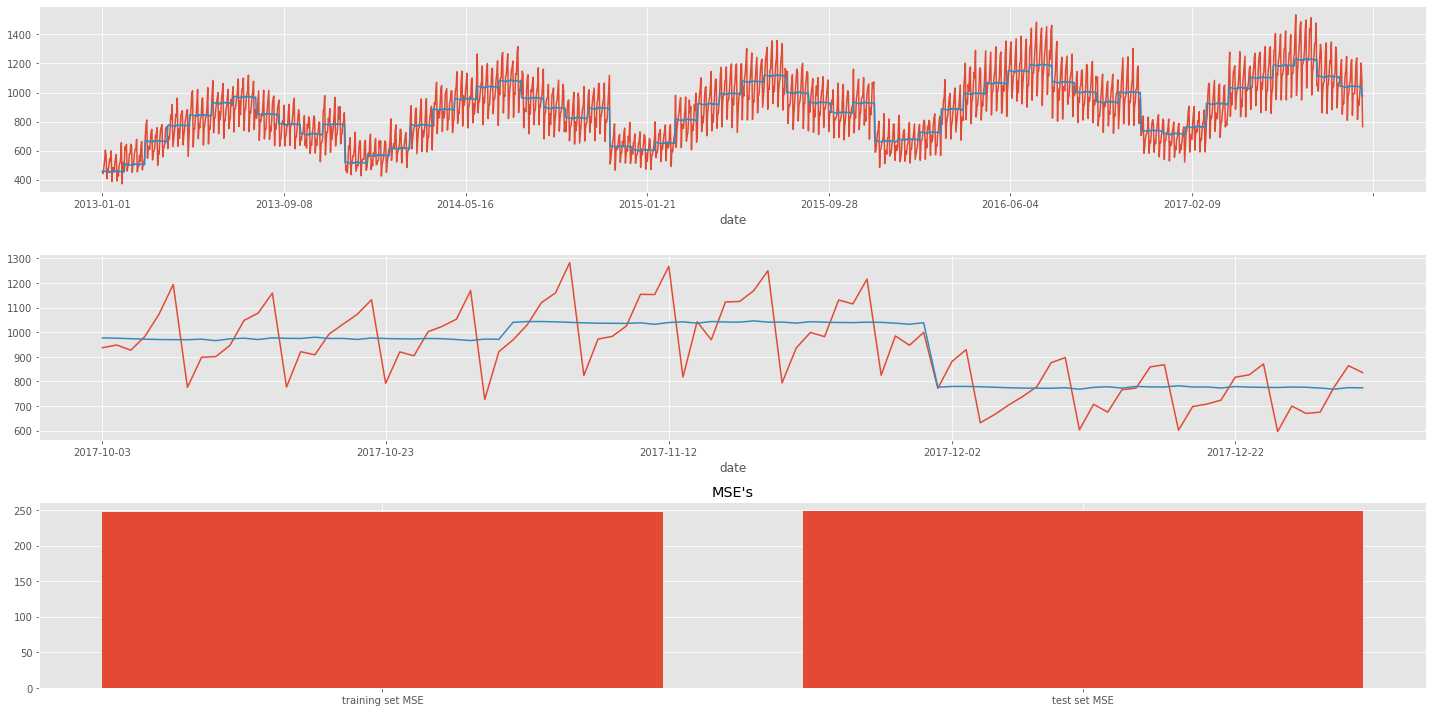

In [203]:
# plot the data
fig, axs = plt.subplots(3,1, figsize=(20,10))
train.groupby('date').sum()['sales'].plot(x='date', y='sales', ax=axs[0])
test.groupby('date').sum()['sales'].plot(x='date', y='sales', ax=axs[1])

## calculate predicted values for sales on train and test set
modelYtrain = w[0]
weight_idx = 1
for input in inputs:
  for i in np.arange(1, order+1):
    modelYtrain += w[weight_idx]*(train[input].values ** i)
    weight_idx += 1

modelYtest = w[0]
weight_idx = 1
for input in inputs:
  for i in np.arange(1, order+1):
    modelYtest += w[weight_idx]*(test[input].values ** i)
    weight_idx += 1

# plot model predictions over data
train[f'{order}-order model'] = modelYtrain; test[f'{order}-order model'] = modelYtest;
train.groupby('date').sum()[f'{order}-order model'].plot(x='date', y=f'{order}-order model', ax=axs[0])
test.groupby('date').sum()[f'{order}-order model'].plot(x='date', y=f'{order}-order model', ax=axs[1])

# plot MSE of model on train and test data
MSE_train = np.mean((train['sales'].values - modelYtrain)**2)
MSE_test = np.mean((test['sales'].values - modelYtest)**2)
axs[2].bar(['training set MSE', 'test set MSE'], [MSE_train, MSE_test])
axs[2].set_title("MSE's")
fig.tight_layout(); fig.show()
print(f"MSE_train: {MSE_train} | MSE_test: {MSE_test}")

In [206]:
test

,date,store,item,sales,year,month,day,1st-order model,1st-order model (w/ store),6th-order model,6-order model,10-order model,50-order model,300-order model
259202,2017-10-03,2,15,119,2017,10,3,109.173619,108.949886,121.995520,121.995520,120.213993,122.250309,122.245890
268332,2017-10-03,7,15,57,2017,10,3,109.173619,108.390554,89.401459,89.401459,73.510839,70.954185,70.949694
257376,2017-10-03,1,15,98,2017,10,3,109.173619,109.061753,94.292528,94.292528,89.798464,89.339714,89.331301
264680,2017-10-03,5,15,73,2017,10,3,109.173619,108.614287,80.568320,80.568320,83.648915,76.711711,76.707401
271984,2017-10-03,9,15,93,2017,10,3,109.173619,108.166822,113.578832,113.578832,102.971922,102.802148,102.797830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266595,2017-12-31,6,15,69,2017,12,31,112.553627,111.882429,52.862622,52.862622,51.109533,55.908207,55.889400
268421,2017-12-31,7,15,51,2017,12,31,112.553627,111.770563,66.033709,66.033709,53.187424,50.371859,50.352778
270247,2017-12-31,8,15,105,2017,12,31,112.553627,111.658696,83.772026,83.772026,96.467398,97.074105,97.055141
272073,2017-12-31,9,15,77,2017,12,31,112.553627,111.546830,90.211082,90.211082,82.648508,82.219821,82.200914
